<a href="https://colab.research.google.com/github/hyemin1826/DSAIL_2021/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 25 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
FOLD='/gdrive/My\ Drive/Internship/2021_summer/Shinhan'
%cp -r $FOLD /intern/
%cd /intern/

In [ ]:
import argument
import datasets
import utils

from models import *
import models

# 1. 데이터 특성 알아보기

In [ ]:
import seaborn as sns
import numpy as np

from datasets import *

df=load_data('df_modi')

2000000


[10 15 20 26 30 28 24 52 29 19 17 13 23 31 21 34 35 41 45 50 16 25 55 27
 56 51 37 32  5 33 43 58 47 57 39 36 12 18 42 59 22 48 14  0 60 38 11  9
 44 64 40 49 46 53  6  7 73 79 61 70 54 69  8 72 66 75 74 71 68 78 76 80
 63 62]


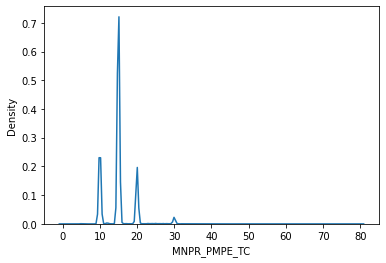

In [ ]:
#@title
print(df['MNPR_PMPE_TC'].unique())
print(df.loc[:,'MNPR_PMPE_TC'].isna().sum()))
#sns.histplot(x=df.loc[:, 'MNPR_PMPE_TC'])
sns.kdeplot(x=df.loc[:, 'MNPR_PMPE_TC'])

[10 15 99 58 41 79 77 38 54 23 70 62 72 33 56 40 64 20 73 43 29 44 27 32
 50 59 45 30 81 76 35 63 66 26 51 49 31 78 80 37 52 65 25 71 48 46 57 61
 53 18 67 60 47 36 22 34 55 24 17 69 74 28 42 68 14 39 21 75 16 19 13 11
 12]
0


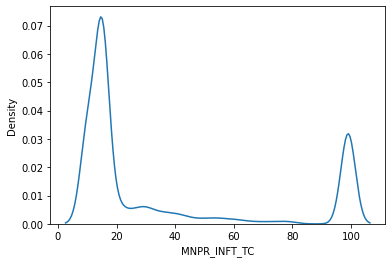

In [ ]:
#@title
print(df['MNPR_INFT_TC'].unique())
print(df.loc[:,'MNPR_INFT_TC'].isna().sum())
sns.kdeplot(x=df['MNPR_INFT_TC'])

[ 10000000  30000000  20000000 ... 101300000 105100000 115100000]
0
314000000  <->  2000000


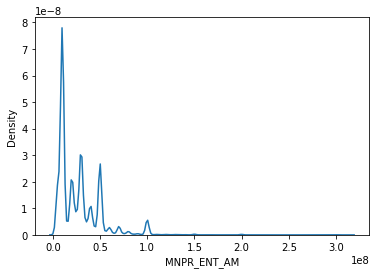

In [ ]:
#@title
# MNPR_ENT_AM (주계약가입금액)
print(df['MNPR_ENT_AM'].unique())
print(df.loc[:,'MNPR_ENT_AM'].isna().sum())
print(df['MNPR_ENT_AM'].max(), " <-> ", df['MNPR_ENT_AM'].min())
sns.kdeplot(x=df['MNPR_ENT_AM'])

[51 57 53 23 56 41 25 42 63 36 32 43 48 47 31 34 44 60 64 49 29 22 39 45
 21 62 26 58 27 46 52 55 30 38 65 28 37 54 50 40 67 35 68 59 72 19 66 73
 24 20 33 69 61 70 74 71 75]
0
75  <->  19


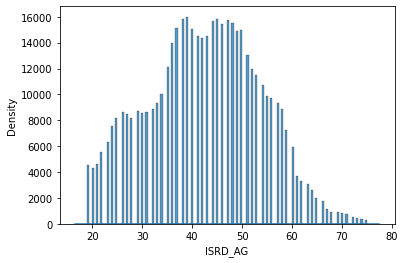

In [ ]:
# ISRD_AG(가입보험나이) -> 60세 이상을 하나로 묶고 싶은데 라벨을 어떻게 해야 할까?
print(df['ISRD_AG'].unique())
print(df.loc[:,'ISRD_AG'].isna().sum())
print(df['ISRD_AG'].max(), " <-> ", df['ISRD_AG'].min())
sns.kdeplot(x=df['ISRD_AG'])
sns.histplot(x=df.loc[:, 'ISRD_AG'])

0
0


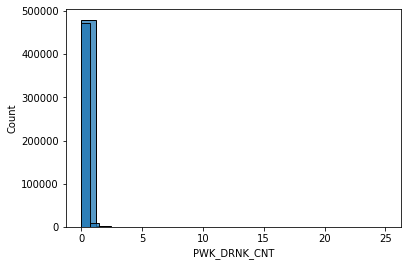

In [ ]:
# PWK_DRNK_CNT & TM1_DRNK_BTL_CN
print(df.loc[:,'PWK_DRNK_CNT'].isna().sum())
#sns.kdeplot(x=df['PWK_DRNK_CNT'])
sns.histplot(x=df.loc[:, 'PWK_DRNK_CNT'])

print(df.loc[:,'TM1_DRNK_BTL_CN'].isna().sum())
sns.histplot(x=df.loc[:, 'TM1_DRNK_BTL_CN'])

In [ ]:
# DRNK
df['PWK_DRNK_CNT']=np.log2(df['PWK_DRNK_CNT']+1)
df['TM1_DRNK_BTL_CN']=np.log2(df['TM1_DRNK_BTL_CN']+1)

# #'MNPR_ENT_AM' (주계약가입금액): min, max 차이 큼 -> log or scaling 
# df['MNPR_ENT_AM']=np.log2(df['MNPR_ENT_AM'])
# print(df['MNPR_ENT_AM'].max(), " <-> ", df['MNPR_ENT_AM'].min())

# # 'MNPR_INFT_TC' : categorical로 바꾸기 (가능?)
# df.loc[df['MNPR_INFT_TC']<=60, 'MNPR_INFT_TC']=0 # 주계약납입기간 짧음
# df.loc[df['MNPR_INFT_TC']>60, 'MNPR_INFT_TC']=1 # 주계약납입기간 >60, 1 (long)

# print(df['MNPR_INFT_TC'].unique())

# # 범위 분류: log취하기
# df['MNPR_PMPE_TC']=np.log2(df['MNPR_PMPE_TC']+1)
# print(df['MNPR_PMPE_TC'].unique())

# MAIN_PVS_CCN : 5~7: 같은 취급하기 (6으로 취급)
# df['MAIN_PVS_CCN']=df['MAIN_PVS_CCN'].map({1:1, 2:2, 3:3, 4:4, 5:6, 6:6, 7:6})
# df.loc[:, 'MAIN_PVS_CCN'].head()

In [ ]:
df.to_csv('df_modi_feature_engineering.csv')

!rm "/gdrive/My Drive/Internship/2021_summer/Shinhan/data/df_modi_feature_engineering.csv"
!yes|cp -rf df_modi_feature_engineering.csv "/gdrive/My Drive/Internship/2021_summer/Shinhan/data/"
%cd "/gdrive/My Drive/Internship/2021_summer/Shinhan/"

/gdrive/My Drive/Internship/2021_summer/Shinhan


In [ ]:
df2=load_data('df_modi_feature_engineering')
print(df2['TM1_DRNK_BTL_CN'].min())

2000000
0.0


# 2. 변경 파일 저장

In [ ]:
import os

%cd /intern/

curr_path=os.getcwd()+"/"

/intern
/intern/


In [ ]:
FILES_NAMES=['datasets.py','argument.py', 'utils.py']
MODELS_NAMES=['XGBoost.py','CatBoost.py','LightGBM.py']

FILES_TO_SAVE=[curr_path + name for name in FILES_NAMES]
MODELS_TO_SAVE=[curr_path+'models/' + name for name in MODELS_NAMES]

TOTAL_TO_SAVE=FILES_TO_SAVE+MODELS_TO_SAVE
print(TOTAL_TO_SAVE)

FOLD_PATH=os.path.join("/gdrive/My Drive/Internship/2021_summer/","Shinhan")
for files in TOTAL_TO_SAVE:
    with open(os.path.join(FOLD_PATH,"/".join(files.split('/')[2:])), 'w') as f:
        f.write(''.join(open(files).readlines()))

['/intern/datasets.py', '/intern/argument.py', '/intern/utils.py', '/intern/models/XGBoost.py', '/intern/models/CatBoost.py', '/intern/models/LightGBM.py']


# 3. Main 코드로 학습하기

In [ ]:
%cd "/gdrive/My Drive/Internship/2021_summer/Shinhan/"

/gdrive/My Drive/Internship/2021_summer/Shinhan


In [ ]:
def main():
    args, _ = argument.parse_args()
    print(args)
    if args.model == 'XGBoost':
        model = XGBoost(args)

    if args.model == 'Catboost':
        model = CatBoost(args)
        
    if args.model == 'LightGBM':
        model = LightGBM(args)
        
    model.train()

# 4. Result

## 술 -> 1회 음주, 음주 빈도수 log (대부분 술 많이 안 마심)

In [ ]:
main()

Namespace(label='majority', model='XGBoost', name='df_modi_feature_engineering', over='SMOTE', over_strategy=0.5, save=False, scaler='MinMax', seed=1, task='overall', under=None, version='Label_enc')
2000000
model-before preprocess
*** Start Preprocessing ***
변경됨~


100%|██████████| 53/53 [00:03<00:00, 14.19it/s]


*** End Preprocessing ***
*** Start Sampling ***


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


*** End Sampling ***
*** Start Training ***
*** End Training ***
Accuracy: 0.896961320225303, Precision: 0.9723655464137964, Recall: 0.917367422788918, F1_score: 0.9440661615791225


## MNPR_INFT_TC (주계약 보험기간) -> 0/1  
Label encoding에서 cat_cols/num_cols도 변경함

In [ ]:
main()

Namespace(label='majority', model='XGBoost', name='df_modi_feature_engineering', over='SMOTE', over_strategy=0.5, save=False, scaler='MinMax', seed=1, task='overall', under=None, version='Label_enc')
model-before preprocess
*** Start Preprocessing ***
변경됨~


100%|██████████| 53/53 [00:03<00:00, 13.95it/s]


*** End Preprocessing ***
*** Start Sampling ***


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


*** End Sampling ***
*** Start Training ***
*** End Training ***
Accuracy: 0.8980421092012554, Precision: 0.9721577726218097, Recall: 0.9187488351185712, F1_score: 0.9446990321907885


## MNPR_PMPE_TC (주계약 납입기간) LOG 취함

In [ ]:
if __name__ == "__main__":
    main()

Namespace(label='majority', model='XGBoost', name='df_modi_feature_engineering', over='SMOTE', over_strategy=0.5, save=False, scaler='MinMax', seed=1, task='overall', under=None, version='Label_enc')
model-before preprocess
*** Start Preprocessing ***


100%|██████████| 53/53 [00:03<00:00, 13.41it/s]


*** End Preprocessing ***
*** Start Sampling ***


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


*** End Sampling ***
*** Start Training ***
*** End Training ***
Accuracy: 0.9018976160289319, Precision: 0.9712971608396445, Recall: 0.9238030500707152, F1_score: 0.9469549679144986


import argument
import datasets
import utils